## Q9_Ans_Implement a Multi-class neural network with a multiple hidden layer for MNSIT Dataset using keras library

## Loading Libraries

In [1]:
import tensorflow as tf                       # deep learning library
import numpy as np                            # for matrix operations
import matplotlib.pyplot as plt               # for visualization
%matplotlib inline

## Loading Data

In [2]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train), (X_test, y_test) = load_data()      # Loading data

## Basic EDA

In [3]:
print("There are ", len(X_train), "images in the training dataset")     # checking total number of records / data points available in the X_train dataset
print("There are ", len(X_test), "images in the test dataset")     # checking total number of records / data points available in the X_test dataset

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
# Checking the shape of one image
X_train[0].shape

(28, 28)

Each image in the dataset is of shape 28X28 numbers (i.e. pixels)

In [5]:
# image looks like
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

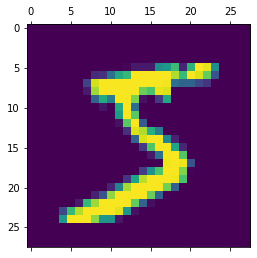

In [6]:
plt.matshow(X_train[0])

In [7]:
# we can use y_train to cross check
y_train[0]

5

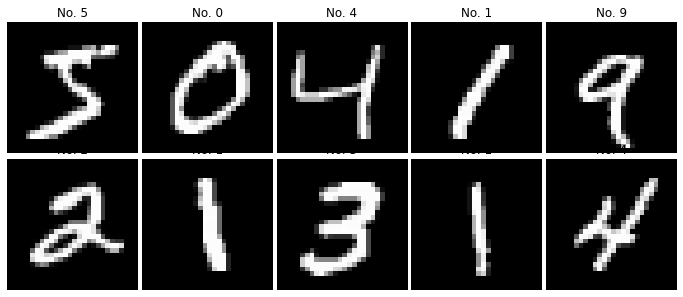

In [8]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [9]:

X_train = X_train / 255
X_test = X_test / 255

"""
divided by 255?:
The pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. """

'\ndivided by 255?:\nThe pixel value lie in the range 0 - 255 representing the RGB (Red Green Blue) value. '

Now if you look at the data, each pixel value should be in range 0 to 1.

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

**Flatten the Data**

We simply convert a 2 dimensional data (i.e. one image data) to 1 dimensional.

In [11]:
X_train.shape

(60000, 28, 28)

In [12]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)    # converting our 2D array representin an image to one dimensional
X_test_flattened = X_test.reshape(len(X_test), 28*28)

Now if you check the shape of our data, it should be 2 dimensional

In [13]:
X_train_flattened.shape

(60000, 784)

**Define the model**

In [14]:
# Defining the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')     # The input shape is 784. 
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


**Compile the model**

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Fit the model**

In [17]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4725 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3034 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2666 - accuracy: 0.9250


**Evaluate the model on unseen data (i.e. X_test_flattened)**

In [18]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2689 - accuracy: 0.9242


[0.2689428925514221, 0.9241999983787537]

The performance of the model on very simple model with no hidden layer is 92.7 %.

**predict for the X_test**

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 983us/step


array([2.3286121e-02, 3.8787888e-07, 4.9498610e-02, 9.5873725e-01,
       2.2726278e-03, 1.3432841e-01, 2.2482959e-06, 9.9978894e-01,
       8.6311966e-02, 7.1073759e-01], dtype=float32)

In [20]:
#np.argmax finds a maximum element from an array and returns the index of it
np.argmax(y_predicted[0])

7

The predicted digit is 7.

Let's see the original digit at first index in X_test. Can see this using matshow() function.

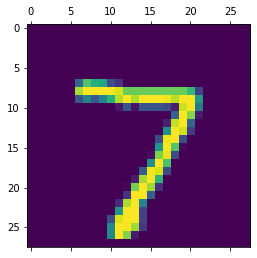

In [21]:
plt.matshow(X_test[0])

Hence the prediction is correct

### Building Neural Network Model Using hidden layer

In [22]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3346 - accuracy: 0.9057
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1383 - accuracy: 0.9598
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0950 - accuracy: 0.9713
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0714 - accuracy: 0.9783
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0577 - accuracy: 0.9830


In [24]:
# Evaluate the model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0819 - accuracy: 0.9757


[0.08188362419605255, 0.9757000207901001]

In [25]:
# Defining the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(100, input_shape=(100,),activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, batch_size= 128,epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3455 - accuracy: 0.9035
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1418 - accuracy: 0.9578
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0973 - accuracy: 0.9704
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0747 - accuracy: 0.9772
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0581 - accuracy: 0.9822


In [27]:
# Evaluate the model
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9749


[0.08719922602176666, 0.9749000072479248]